# Network IO Preprocessing

In [22]:
from pandas import DataFrame
from pandas import read_csv
from pandas import set_option
from matplotlib import pyplot

set_option('display.max_columns', 50)

In [23]:
df = read_csv('networkio.csv', header=0)
df.head()

,@timestamp,system.network.in.bytes,system.network.in.packets,system.network.in.dropped,system.network.in.errors,system.network.out.bytes,system.network.out.packets,system.network.out.dropped,system.network.out.errors
0,"October 2nd 2018, 00:00:07.548",162.159GB,"314,247,915","170,271",0,158.015GB,"330,592,456",0,"169,263"
1,"October 2nd 2018, 00:00:17.548",162.163GB,"314,255,213","170,271",0,158.019GB,"330,600,271",0,"169,267"
2,"October 2nd 2018, 00:00:27.548",162.167GB,"314,263,082","170,271",0,158.022GB,"330,608,529",0,"169,272"
3,"October 2nd 2018, 00:00:37.548",162.171GB,"314,269,917","170,273",0,158.026GB,"330,616,148",0,"169,275"
4,"October 2nd 2018, 00:00:46.362",162.174GB,"314,276,176","170,275",0,158.03GB,"330,622,675",0,"169,276"


## Remove B KB MB GB

In [24]:
for i in range(1, df.shape[1]):
    selected_col = df.iloc[:, i]
    col_type = type(selected_col[0])
    
    if(col_type == str):
        df.iloc[:, i] = df.iloc[:, i].str.replace(',', '')
        
        if(selected_col.iloc[0].endswith('B') != -1):
            for index, row in DataFrame(df.iloc[:, i]).iterrows():
                if (row.values[0].find('GB') != -1):
                    df.iloc[[index],[i]] = float(row.values[0].replace('GB','').replace(',',''))*1000000000
                    
                elif (row.values[0].find('MB') != -1):
                    df.iloc[[index],[i]] = float(row.values[0].replace('MB','').replace(',',''))*1000000
                    
                elif (row.values[0].find('KB') != -1):
                    df.iloc[[index],[i]] = float(row.values[0].replace('KB','').replace(',',''))*1000
                
                elif (row.values[0].find('B') != -1):
                    df.iloc[[index],[i]] = float(row.values[0].replace('B','').replace(',',''))
        else:
            df.iloc[:, i] = df.iloc[:, i].str.astype('float')

df.head()

,@timestamp,system.network.in.bytes,system.network.in.packets,system.network.in.dropped,system.network.in.errors,system.network.out.bytes,system.network.out.packets,system.network.out.dropped,system.network.out.errors
0,"October 2nd 2018, 00:00:07.548",162159000000,314247915,170271,0,158015000000,330592456,0,169263
1,"October 2nd 2018, 00:00:17.548",162163000000,314255213,170271,0,158019000000,330600271,0,169267
2,"October 2nd 2018, 00:00:27.548",162167000000,314263082,170271,0,158022000000,330608529,0,169272
3,"October 2nd 2018, 00:00:37.548",162171000000,314269917,170273,0,158026000000,330616148,0,169275
4,"October 2nd 2018, 00:00:46.362",162174000000,314276176,170275,0,158030000000,330622675,0,169276


In [25]:
df.to_csv("networkio-cleaned.csv");

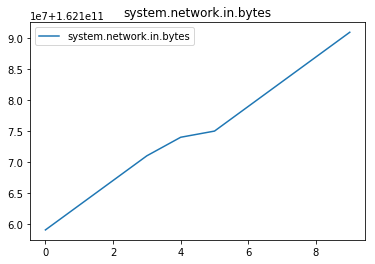

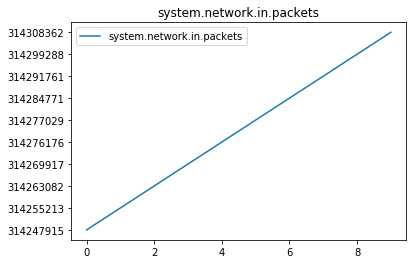

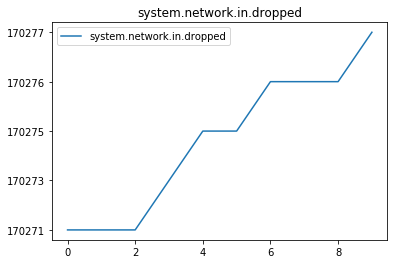

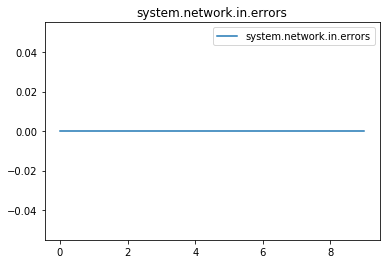

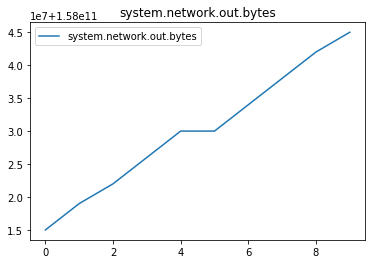

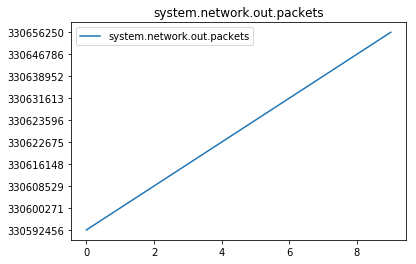

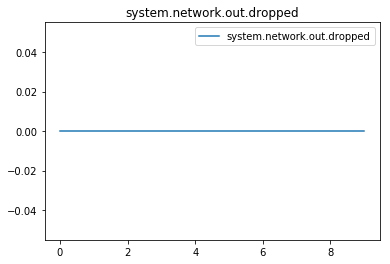

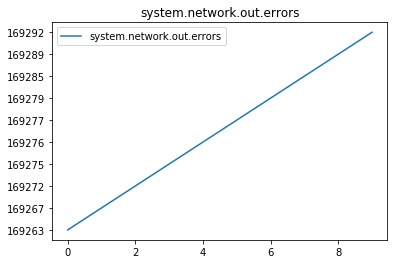

In [26]:
for i in range(1, df.shape[1]):
    pyplot.plot(df[df.columns[i]], label=df.columns[i])
    pyplot.legend()
    pyplot.title(df.columns[i])
    pyplot.show()